In [202]:
import json, os, re
import matplotlib.pyplot as plt
import numpy as np

# Data load

In [52]:
# Директория с данными json
dir0 = r'D:\Competitions_Tasks\Sber_Sound_classifier_new\answers'
os.listdir(dir0)

['AMinyaeva_audio_sample_1.json',
 'AMinyaeva_audio_sample_2.json',
 'ASmirnova_audio_sample_1.json',
 'ASmirnova_audio_sample_2.json',
 'DGorbunov_audio_sample_1.json']

In [111]:
# Функция перевода списка списков в одно измерение типа flatten (да да я помню что есть такая в itertools)) )
# list_l - <list> - список списков
# return - 1d list
def one_dim(list_l):
    l = []
    for i in list_l:
        l = l + i
    return l

In [123]:
# Соберем все данные из всех json, также посмотрим насколько целесообразно в них использовать вложенные списки
# с помощью переменных LENS1 = []; LENS2 = []; LENS3 = []
DT = []; LENS1 = []; LENS2 = []; LENS3 = []
for ff in os.listdir(dir0):
    dt = json.load(open(os.path.join(dir0, ff), 'r'))
    dt1 = []
    for i in dt:
        LENS1 = LENS1 + [len(i['completions'])]
        try:
            LENS2 = LENS2 + [len(i['completions'][0]['result'])]  
        except IndexError: 
            pass
        try:
            LENS3 = LENS3 + [len(i['completions'][0]['result'][0]['value']['choices'])]  
        except IndexError: 
            pass
        try:
            val1 = os.path.split(i['task_path'])[1]
            val2 = i['completions'][0]['result'][0]['value']['choices']
            dt1 = dt1 + [[val1, val2]]
        except IndexError:
            pass
    DT = DT + dt1

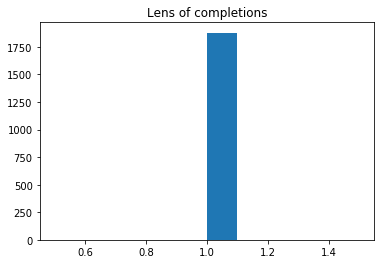

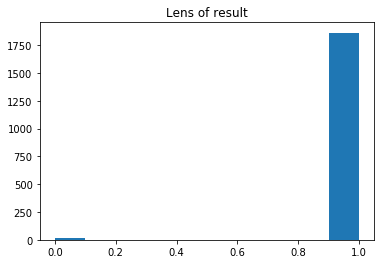

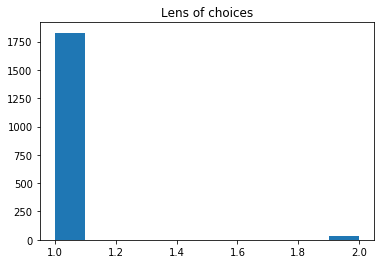

In [124]:
# Посмотрим на перемнные LENS1 = []; LENS2 = []; LENS3 = []
plt.title('Lens of completions')
plt.hist(LENS1)
plt.show()
# Данная переменная показывает что первый вложенный список в структуре json нецелесообразен
plt.title('Lens of result')
plt.hist(LENS2)
plt.show()
# Данная переменная показывает что второй вложенный список в структуре json нецелесообразен, также есть неразмеченные 
# данные
plt.title('Lens of choices')
plt.hist(LENS3)
plt.show()
# Данная переменная показывает что данных с пересекающимися типами дефектов - редкость, что странно

In [170]:
# перейдем непосредственно к финальному формированию данных, в форме удобной для исследования
Keys_in_set = set(one_dim([i[1] for i in DT]))
others = ['Дефектов нет', 'Присутсвуют другие дефекты']
keys = ['Акцент', 'Брадилалия', 'Дислалия', 'Заикание', 'Тахилалия', 'Технические помехи']
mantiss = {'незначительн': 1, 'существенн': 2, 'очень сильн': 3, 'отсутствует': 0}

# Функция поиска шаблонов обозначения дефектов, ввиду того что разметка осуществлялась литералами а не 
# цифрами необходимо применение такой функции
# list_ <list> - список с дефектами и их степенями
# return - словарь со значениями каждого дефекта для каждого сампла
def pat_find(list_):
    dict_ = {i: [0, ] for i in (others+keys)}
    pat1 = re.compile('|'.join(oters))
    pat2 = re.compile('|'.join(keys))
    pat3 = re.compile('|'.join(mantiss.keys()))
    for val in list_:
        q1 = pat1.findall(val)
        if q1:
            dict_[q1[0]] = [1, ]
            return dict_
        q2 = pat2.findall(val)
        if q2:
            q3 = mantiss[pat3.findall(val)[0]]
            dict_[q2[0]] = [q3, ]
    return dict_

Keys_in_set

{'Акцент (незначительный)',
 'Акцент (очень сильный)',
 'Акцент (существенный)',
 'Брадилалия (незначительная)',
 'Брадилалия (существенная)',
 'Дефектов нет',
 'Дислалия (незначительная)',
 'Дислалия (очень сильная)',
 'Дислалия (существенная)',
 'Заикание (незначительное)',
 'Заикание (существенное)',
 'Присутсвуют другие дефекты',
 'Тахилалия (незначительная)',
 'Тахилалия (существенная)',
 'Технические помехи (незначительные)',
 'Технические помехи (очень сильные)',
 'Технические помехи (существенные)'}

In [171]:
# Соберем словарь из всех самплов для каждого разметчика (с пересечениями)
DT1 = []
for i in DT:
    val1 = i[0]
    val2 = pat_find(i[1])
    DT1 = DT1 + [[val1, val2]]

In [173]:
DT1

[['5a1527c83cf6bc00018a838e_2.wav',
  {'Дефектов нет': [0],
   'Присутсвуют другие дефекты': [0],
   'Акцент': [0],
   'Брадилалия': [0],
   'Дислалия': [1],
   'Заикание': [0],
   'Тахилалия': [0],
   'Технические помехи': [0]}],
 ['5a99803d372cc03974e9c9cd_2.wav',
  {'Дефектов нет': [0],
   'Присутсвуют другие дефекты': [0],
   'Акцент': [0],
   'Брадилалия': [0],
   'Дислалия': [0],
   'Заикание': [0],
   'Тахилалия': [0],
   'Технические помехи': [1]}],
 ['5c576abb49398100013bce54_2.wav',
  {'Дефектов нет': [0],
   'Присутсвуют другие дефекты': [0],
   'Акцент': [0],
   'Брадилалия': [0],
   'Дислалия': [2],
   'Заикание': [0],
   'Тахилалия': [0],
   'Технические помехи': [0]}],
 ['5c57d544493981000153f9ae_2.wav',
  {'Дефектов нет': [1],
   'Присутсвуют другие дефекты': [0],
   'Акцент': [0],
   'Брадилалия': [0],
   'Дислалия': [0],
   'Заикание': [0],
   'Тахилалия': [0],
   'Технические помехи': [0]}],
 ['5c57df83493981000155ed30_2.wav',
  {'Дефектов нет': [0],
   'Присутсвуют 

In [177]:
# Переформируем списко в словарь со всеми значениями сгруппированными по разметчикам (без повторений)
DT2 = {}
for i in DT1:
    if i[0] in DT2:
        val0 = DT2[i[0]]
        val1 = i[1]
        DT2[i[0]] = {i: val0[i] + val1[i] for i in val0}
    else:
        DT2.update({i[0]: i[1]})

In [180]:
len(DT2)

687

In [179]:
DT2

{'5a1527c83cf6bc00018a838e_2.wav': {'Дефектов нет': [0, 1, 0],
  'Присутсвуют другие дефекты': [0, 0, 0],
  'Акцент': [0, 0, 0],
  'Брадилалия': [0, 0, 2],
  'Дислалия': [1, 0, 0],
  'Заикание': [0, 0, 0],
  'Тахилалия': [0, 0, 0],
  'Технические помехи': [0, 0, 0]},
 '5a99803d372cc03974e9c9cd_2.wav': {'Дефектов нет': [0, 0, 0],
  'Присутсвуют другие дефекты': [0, 0, 0],
  'Акцент': [0, 0, 0],
  'Брадилалия': [0, 0, 0],
  'Дислалия': [0, 0, 0],
  'Заикание': [0, 0, 0],
  'Тахилалия': [0, 0, 0],
  'Технические помехи': [1, 1, 1]},
 '5c576abb49398100013bce54_2.wav': {'Дефектов нет': [0, 0, 0],
  'Присутсвуют другие дефекты': [0, 0, 0],
  'Акцент': [0, 0, 0],
  'Брадилалия': [0, 0, 0],
  'Дислалия': [2, 1, 1],
  'Заикание': [0, 0, 0],
  'Тахилалия': [0, 0, 0],
  'Технические помехи': [0, 0, 1]},
 '5c57d544493981000153f9ae_2.wav': {'Дефектов нет': [1, 1, 0],
  'Присутсвуют другие дефекты': [0, 0, 0],
  'Акцент': [0, 0, 0],
  'Брадилалия': [0, 0, 1],
  'Дислалия': [0, 0, 0],
  'Заикание': [

In [186]:
# Заголовок формируемого excel файла
Header = ['id'] + list(DT2['5a1527c83cf6bc00018a838e_2.wav'].keys())
Header

['id',
 'Дефектов нет',
 'Присутсвуют другие дефекты',
 'Акцент',
 'Брадилалия',
 'Дислалия',
 'Заикание',
 'Тахилалия',
 'Технические помехи']

In [192]:
import xlwt
from datetime import datetime

wb = xlwt.Workbook()
ws = wb.add_sheet('A Test Sheet')

cnt = 0
for i in Header:
    ws.write(0, cnt, i)
    cnt = cnt + 1

cnt1 = 1
for i in DT2:
    cnt2 = 0
    ws.write(cnt1, cnt2, i)
    cnt2 = cnt2 + 1
    for j in Header[1:]:
        ws.write(cnt1, cnt2, str(DT2[i][j])[1: -1])
        cnt2 = cnt2 + 1
    cnt1 = cnt1 + 1

wb.save(r'D:\Competitions_Tasks\Sber_Sound_classifier_new\answers.xls')

# Analytics

In [224]:
# данные размеченные 3 разметчиками
DT2_3 = {i: DT2[i] for i in DT2 if len(DT2[i]['Акцент'])==3} 
# данные размеченные 2 разметчиками
DT2_2 = {i: DT2[i] for i in DT2 if len(DT2[i]['Акцент'])==2}
# данные размеченные 1 разметчиком
DT2_1 = {i: DT2[i] for i in DT2 if len(DT2[i]['Акцент'])==1}
# данные усредненные между всеми разметчиками - далее при построении модели рекомендуется использовать именно такой набор
DT2_mean = {i: {j: round(np.array(DT2[i][j]).mean()) for j in DT2[i]} for i in DT2}
Header[1:]     

['Дефектов нет',
 'Присутсвуют другие дефекты',
 'Акцент',
 'Брадилалия',
 'Дислалия',
 'Заикание',
 'Тахилалия',
 'Технические помехи']

In [236]:
# Сбалансированность классов относительно общего числа самплов
for type_ in Header[1:]:
    val = np.array([DT2_mean[i][type_] for i in DT2_mean])
    print(type_, ': ', np.count_nonzero(val), '\\', len(val))
# Целесообразно для попытки построения модели использовать(без градуировки степени)
#Дефектов нет :  233 \ 687
#Акцент :  82 \ 687
#Брадилалия :  146 \ 687
#Дислалия :  74 \ 687
#Технические помехи :  101 \ 687

Дефектов нет :  233 \ 687
Присутсвуют другие дефекты :  0 \ 687
Акцент :  82 \ 687
Брадилалия :  146 \ 687
Дислалия :  74 \ 687
Заикание :  4 \ 687
Тахилалия :  6 \ 687
Технические помехи :  101 \ 687


In [248]:
# Функция вычисления простой скоррелированности значений
# list_ - <list> - список списков значений типа [[1, 0], [1, 1], [2, 1], ... [0, 0]]
# hard_corr - <bool> - включение режима проверки с учетом грейда класса дефекта
# return - отношение совпадающих значений к общему
def simple_corr(list_, hard_corr=True): 
    L = len(list_)
    if hard_corr:
        cnt = 0
        for i in list_:
            if i[0]==i[1]:
                cnt = cnt + 1
            else:
                pass
        return cnt/L
    else:
        cnt = 0
        for i in list_:
            if i[0]==i[1] or (i[0]>0 and i[1]>0):
                cnt = cnt + 1
            else:
                pass
        return cnt/L

In [254]:
# Согласованность для набора данных, размечаемого 2 разметчиками

print('Соглассованность с точностью до степени дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_2[i][type_] for i in DT2_2])
    val = simple_corr(val0)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))
    
print('\nСоглассованность с точностью до типа дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_2[i][type_] for i in DT2_2])
    val = simple_corr(val0, hard_corr=False)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))

Соглассованность с точностью до степени дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.603
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.969
Согласованность разметчиков по типу дефекта - Акцент :  0.809
Согласованность разметчиков по типу дефекта - Брадилалия :  0.747
Согласованность разметчиков по типу дефекта - Дислалия :  0.907
Согласованность разметчиков по типу дефекта - Заикание :  1.0
Согласованность разметчиков по типу дефекта - Тахилалия :  0.985
Согласованность разметчиков по типу дефекта - Технические помехи :  0.866
Общая оценка: 0.86

Соглассованность с точностью до типа дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.603
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.969
Согласованность разметчиков по типу дефекта - Акцент :  0.825
Согласованность разметчиков по типу дефекта - Брадилалия :  0.768
Согласованность разметчиков по типу дефекта - Дислалия :  0.938


In [256]:
# Согласованность для набора данных, размечаемого 3 разметчиками
# 1 и 2

print('Соглассованность с точностью до степени дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][:2] for i in DT2_3])
    val = simple_corr(val0)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))
    
print('\nСоглассованность с точностью до типа дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][:2] for i in DT2_3])
    val = simple_corr(val0, hard_corr=False)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))

Соглассованность с точностью до степени дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.705
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.978
Согласованность разметчиков по типу дефекта - Акцент :  0.859
Согласованность разметчиков по типу дефекта - Брадилалия :  0.788
Согласованность разметчиков по типу дефекта - Дислалия :  0.898
Согласованность разметчиков по типу дефекта - Заикание :  0.994
Согласованность разметчиков по типу дефекта - Тахилалия :  0.99
Согласованность разметчиков по типу дефекта - Технические помехи :  0.851
Общая оценка: 0.88

Соглассованность с точностью до типа дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.705
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.978
Согласованность разметчиков по типу дефекта - Акцент :  0.876
Согласованность разметчиков по типу дефекта - Брадилалия :  0.802
Согласованность разметчиков по типу дефекта - Дислалия :  0.925

In [257]:
# 2 и 3

print('Соглассованность с точностью до степени дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][1:] for i in DT2_3])
    val = simple_corr(val0)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))
    
print('\nСоглассованность с точностью до типа дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][1:] for i in DT2_3])
    val = simple_corr(val0, hard_corr=False)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))

Соглассованность с точностью до степени дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.646
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.99
Согласованность разметчиков по типу дефекта - Акцент :  0.896
Согласованность разметчиков по типу дефекта - Брадилалия :  0.578
Согласованность разметчиков по типу дефекта - Дислалия :  0.923
Согласованность разметчиков по типу дефекта - Заикание :  0.99
Согласованность разметчиков по типу дефекта - Тахилалия :  0.982
Согласованность разметчиков по типу дефекта - Технические помехи :  0.841
Общая оценка: 0.86

Соглассованность с точностью до типа дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.646
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.99
Согласованность разметчиков по типу дефекта - Акцент :  0.906
Согласованность разметчиков по типу дефекта - Брадилалия :  0.619
Согласованность разметчиков по типу дефекта - Дислалия :  0.945
С

In [259]:
# 1 и 3

print('Соглассованность с точностью до степени дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][::2] for i in DT2_3])
    val = simple_corr(val0)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))
    
print('\nСоглассованность с точностью до типа дефекта:')
all_ = 0
for type_ in Header[1:]:
    val0 = np.array([DT2_3[i][type_][::2] for i in DT2_3])
    val = simple_corr(val0, hard_corr=False)
    print('Согласованность разметчиков по типу дефекта -', type_, ': ',round(val, 3))
    all_ = all_ + val
print('Общая оценка:', round(all_/len(Header[1:]), 2))

Соглассованность с точностью до степени дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.68
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.988
Согласованность разметчиков по типу дефекта - Акцент :  0.882
Согласованность разметчиков по типу дефекта - Брадилалия :  0.629
Согласованность разметчиков по типу дефекта - Дислалия :  0.892
Согласованность разметчиков по типу дефекта - Заикание :  0.996
Согласованность разметчиков по типу дефекта - Тахилалия :  0.98
Согласованность разметчиков по типу дефекта - Технические помехи :  0.813
Общая оценка: 0.86

Соглассованность с точностью до типа дефекта:
Согласованность разметчиков по типу дефекта - Дефектов нет :  0.68
Согласованность разметчиков по типу дефекта - Присутсвуют другие дефекты :  0.988
Согласованность разметчиков по типу дефекта - Акцент :  0.9
Согласованность разметчиков по типу дефекта - Брадилалия :  0.682
Согласованность разметчиков по типу дефекта - Дислалия :  0.919
Сог